Keyword Performance Data Analysis 

In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

# Establish database connection
mydb = pymysql.connect(
    host="localhost",
    user="root",
    passwd="shivani@2024",
    database="internship"
)

# Create a cursor object
mycursor = mydb.cursor()

# Show all tables in the internship database
mycursor.execute("SHOW TABLES")
for table in mycursor:
    print(table)

# Perform the left join with multiple tables
query = """
SELECT `traffic main table`.*, 
       `competition_lookup`.*, 
       `keyword_dfclty_id`.*, 
       `last_seen_lookup`.*, 
       `search vol_lookup`.*, 
       `traffic_cost_id_lookup`.*, 
       `traffic_id_lookup`.*
FROM `traffic main table`
LEFT JOIN `competition_lookup` ON `traffic main table`.`Competition_ID` = `competition_lookup`.`Competition_ID`
LEFT JOIN `keyword_dfclty_id` ON `traffic main table`.`Keyword_df_ID` = `keyword_dfclty_id`.`Keyword_df_ID`
LEFT JOIN `last_seen_lookup` ON `traffic main table`.`Last_seen_ID` = `last_seen_lookup`.`Last_seen_ID`
LEFT JOIN `search vol_lookup` ON `traffic main table`.`Search Vol_ID` = `search vol_lookup`.`Search Vol_ID`
LEFT JOIN `traffic_cost_id_lookup` ON `traffic main table`.`Traffic_Cost_ID` = `traffic_cost_id_lookup`.`Traffic_Cost_ID`
LEFT JOIN `traffic_id_lookup` ON `traffic main table`.`Traffic_ID` = `traffic_id_lookup`.`Traffic_ID`
"""

mycursor.execute(query)
results = mycursor.fetchall()

# Get column names
column_names = [i[0] for i in mycursor.description]

# Close the cursor and database connection
mycursor.close()
mydb.close()

# Convert results to DataFrame
df = pd.DataFrame(results, columns=column_names)

# Display the DataFrame
print(df)


('competition_lookup',)
('keyword_dfclty_id',)
('last_seen_lookup',)
('search vol_lookup',)
('traffic main table',)
('traffic_cost_id_lookup',)
('traffic_id_lookup',)
                                                 Title  \
0    PMP® Exam & Certification | Flat 40% Off - Enr...   
1    PMP® Exam & Certification | Confidently Ace Th...   
2    PMP® Training & Exam | Special Offer: Get $400...   
3    CSM Scrum Master Course Online | Today's Offer...   
4     PMP® Certification | Ace PMP Exam in 1st Attempt   
..                                                 ...   
193  PMP® Exam & Certification - Flat 40% Off - Enr...   
194  Certified Scrum Product Owner® | Limited Offer...   
195                          PMP® Certification Course   
196  TOGAF® Certification Exam Cost | TOGAF® Free E...   
197  Master ITIL 4 Foundation - 100% Exam Pass Guar...   

                                        Keyword  Keyword_ID  Position  \
0                             pmp certification           7    

In [3]:
# Print the column names of the DataFrame
print(df.columns)


Index(['Title', 'Keyword', 'Keyword_ID', 'Position', 'Previous position',
       'Search Vol_ID', 'CPC', 'Traffic_ID', 'Traffic_Cost_ID',
       'Competition_ID', 'Number of Results', 'Trends', 'Last_seen_ID',
       'Keyword_df_ID', 'ï»¿Competition', 'Competition_ID',
       'ï»¿Keyword Difficulty', 'Keyword_df_ID', 'ï»¿Last Seen',
       'Last_seen_ID', 'ï»¿Search Volume', 'Search Vol_ID', 'ï»¿Traffic Cost',
       'Traffic Cost (%)', 'Traffic_Cost_ID', 'ï»¿Traffic', 'Traffic (%)',
       'Traffic_ID'],
      dtype='object')


In [2]:
# List of columns to be removed
columns_to_remove = ['Search Vol_ID', 'Traffic_ID', 'Traffic_Cost_ID', 'Competition_ID', 'Last_seen_ID', 'Keyword_df_ID']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Display the DataFrame without the specified columns
print(df)


                                                 Title  \
0    PMP® Exam & Certification | Flat 40% Off - Enr...   
1    PMP® Exam & Certification | Confidently Ace Th...   
2    PMP® Training & Exam | Special Offer: Get $400...   
3    CSM Scrum Master Course Online | Today's Offer...   
4     PMP® Certification | Ace PMP Exam in 1st Attempt   
..                                                 ...   
193  PMP® Exam & Certification - Flat 40% Off - Enr...   
194  Certified Scrum Product Owner® | Limited Offer...   
195                          PMP® Certification Course   
196  TOGAF® Certification Exam Cost | TOGAF® Free E...   
197  Master ITIL 4 Foundation - 100% Exam Pass Guar...   

                                        Keyword  Keyword_ID  Position  \
0                             pmp certification           7         1   
1                             pmp certification           7         1   
2                             pmp certification           7         2   
3          

In [3]:
# Display summary statistics
print(df.describe())

# Display information about the DataFrame
print(df.info())

       Keyword_ID    Position  Previous position         CPC  \
count  198.000000  198.000000         198.000000  198.000000   
mean     6.333333    2.545455           2.398990    3.925101   
std      2.556965    1.523239           1.560099    3.861980   
min      1.000000    1.000000           0.000000    0.000000   
25%      6.000000    1.000000           1.000000    2.310000   
50%      7.000000    2.000000           2.000000    3.210000   
75%      7.000000    4.000000           4.000000    4.492500   
max     11.000000    6.000000           6.000000   46.860000   

       Number of Results  ï»¿Competition  ï»¿Keyword Difficulty  \
count       1.980000e+02      198.000000             174.000000   
mean        4.596240e+07        0.382879              51.436782   
std         1.465661e+08        0.198383              15.787389   
min         0.000000e+00        0.000000              12.000000   
25%         2.685000e+06        0.190000              42.000000   
50%         5.575000e

Handling Missing Values Identify and handle any missing values in the dataset.

In [8]:
print(df.isnull().sum())

Title                     0
Keyword                   0
Keyword_ID                0
Position                  0
Previous position         0
CPC                       0
Number of Results         0
Trends                    0
ï»¿Competition            0
ï»¿Keyword Difficulty    24
ï»¿Last Seen              0
ï»¿Search Volume          0
ï»¿Traffic Cost           0
Traffic Cost (%)          0
ï»¿Traffic                0
Traffic (%)               0
dtype: int64


In [4]:
# Check for missing values and handle them if they exist
if df.isnull().values.any():
    # Fill missing values with the mean of each numerical column only
    numerical_columns = df.select_dtypes(include='number').columns
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    print("\nMissing values detected and filled with mean.")
else:
    print("\nNo missing values detected.")

# Display DataFrame after handling missing values (if any)
print("\nDataFrame after handling missing values (if any):")
print(df.head())


Missing values detected and filled with mean.

DataFrame after handling missing values (if any):
                                               Title  \
0  PMP® Exam & Certification | Flat 40% Off - Enr...   
1  PMP® Exam & Certification | Confidently Ace Th...   
2  PMP® Training & Exam | Special Offer: Get $400...   
3  CSM Scrum Master Course Online | Today's Offer...   
4   PMP® Certification | Ace PMP Exam in 1st Attempt   

                      Keyword  Keyword_ID  Position  Previous position   CPC  \
0           pmp certification           7         1                  1  3.76   
1           pmp certification           7         1                  1  3.76   
2           pmp certification           7         2                  2  3.82   
3  scrum master certification           2         1                  1  3.21   
4           pmp certification           7         3                  3  3.82   

   Number of Results                                            Trends  \
0         

In [5]:
# Check for duplicated rows
print(df.duplicated().sum())

# Remove duplicated rows
df.drop_duplicates(inplace=True)

0


In [6]:
# Clean up column names
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace
df.columns = df.columns.str.replace('ï»¿', '', regex=False)  # Remove encoding characters if present

# Check the cleaned column names
print("\nCleaned column names:")
print(df.columns)



Cleaned column names:
Index(['Title', 'Keyword', 'Keyword_ID', 'Position', 'Previous position',
       'CPC', 'Number of Results', 'Trends', 'Competition',
       'Keyword Difficulty', 'Last Seen', 'Search Volume', 'Traffic Cost',
       'Traffic Cost (%)', 'Traffic', 'Traffic (%)'],
      dtype='object')


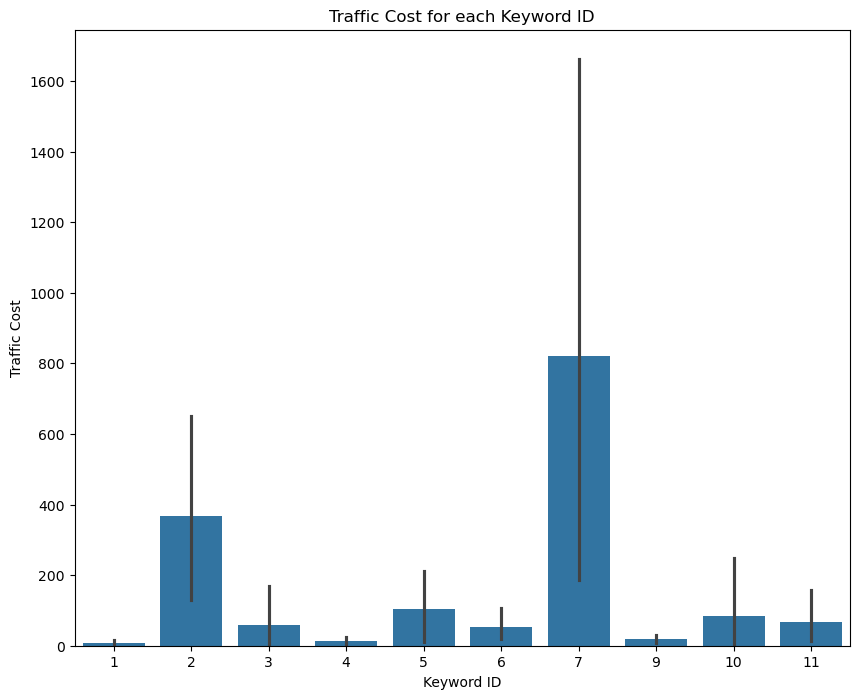

In [23]:
#Data Distribution (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for Keyword_ID vs. Traffic Cost
plt.figure(figsize=(10, 8))
sns.barplot(x='Keyword_ID', y='Traffic Cost', data=df)
plt.title('Traffic Cost for each Keyword ID')
plt.xlabel('Keyword ID')
plt.ylabel('Traffic Cost')
plt.show()


Insights:
1. High Performers: Keywords 2 and 7 have the highest traffic costs, making them crucial for your campaign.
2. Low Performers: Keywords 1, 4, 5, 6, 9, 10, and 11 have lower traffic costs and might need optimization.

Recommendations:
1. Invest in High Performers: Allocate more budget to Keywords 2 and 7.
2. Optimize Low Performers: Improve targeting and ad copy for Keywords 1, 4, 5, 6, 9, 10, and 11.
3. Monitor Variability: Watch for cost fluctuations to adjust strategies as needed.
4. Seasonal Adjustments: Plan campaigns around peak traffic times.


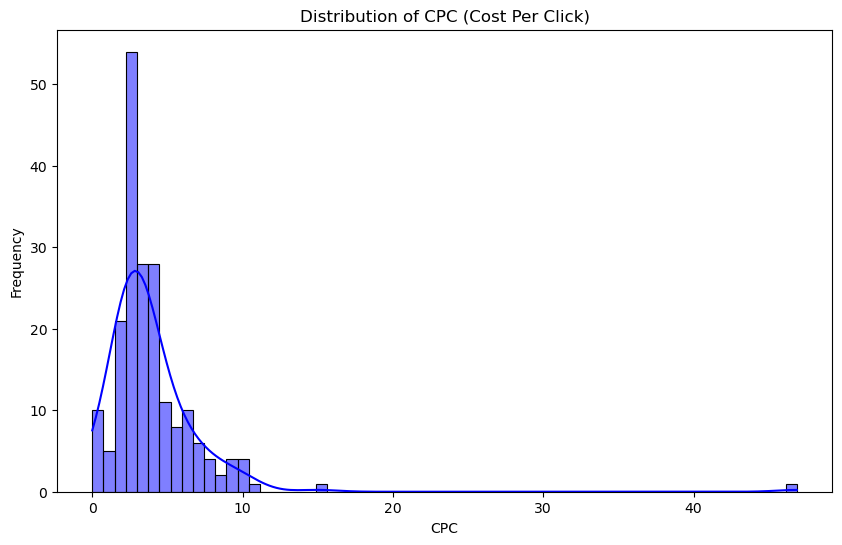

In [15]:
# Plotting the distribution of 'CPC' (Cost Per Click)
plt.figure(figsize=(10, 6))
sns.histplot(df['CPC'], kde=True, color='blue')
plt.title('Distribution of CPC (Cost Per Click)')
plt.xlabel('CPC')
plt.ylabel('Frequency')
plt.show()


1. Shape of Distribution: The data is right-skewed, with more data points at lower CPC values and a tail towards higher values.

2. Central Tendency: The mode (most frequent value) is around the CPC value of 4-6.

3. Spread: CPC values range from 0 to 40, with most values between 0 and 10.

4. Outliers: No obvious outliers, but the tail suggests a few higher CPC values.

5. Inference: CPC is mostly low, with fewer higher values pulling the average to the right. This indicates a natural distribution or factors influencing some higher values.



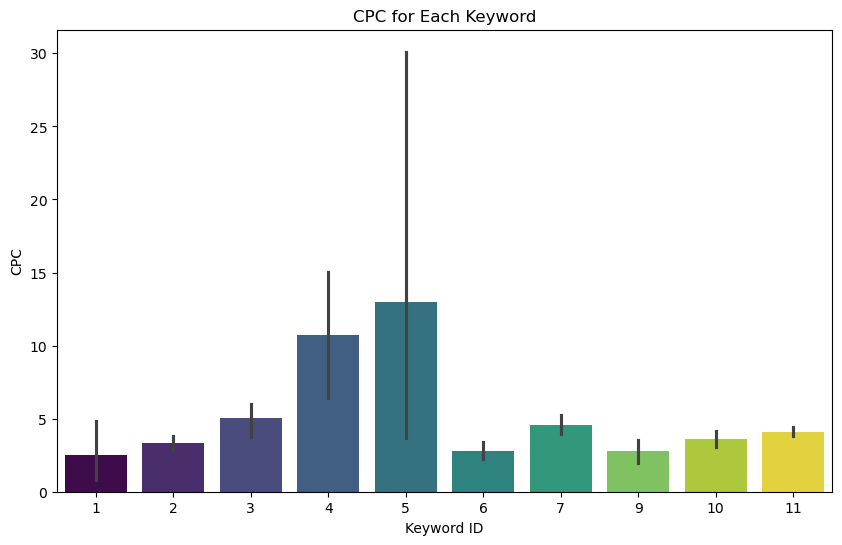

In [20]:

# 'Keyword_ID' and 'CPC' Relationship
df_sorted = df.sort_values(by='CPC', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword_ID', y='CPC', hue='Keyword_ID', data=df_sorted, palette='viridis', dodge=False, legend=False)
plt.title('CPC for Each Keyword')
plt.xlabel('Keyword ID')
plt.ylabel('CPC')
plt.show()


Insights:
1. High CPC Categories: Categories 4 and 5 have the highest CPC values.
2. Low CPC Categories: Categories 1, 2, and 11 have the lowest CPC values.
3. Variability: Significant variability in categories 4 and 5.

Recommendations:
1. Investigate High CPC: Analyze and stabilize categories 4 and 5.
2. Optimize Low CPC: Increase budget for categories 1, 2, and 11.
3. Monitor Performance: Continuously track and optimize campaigns.

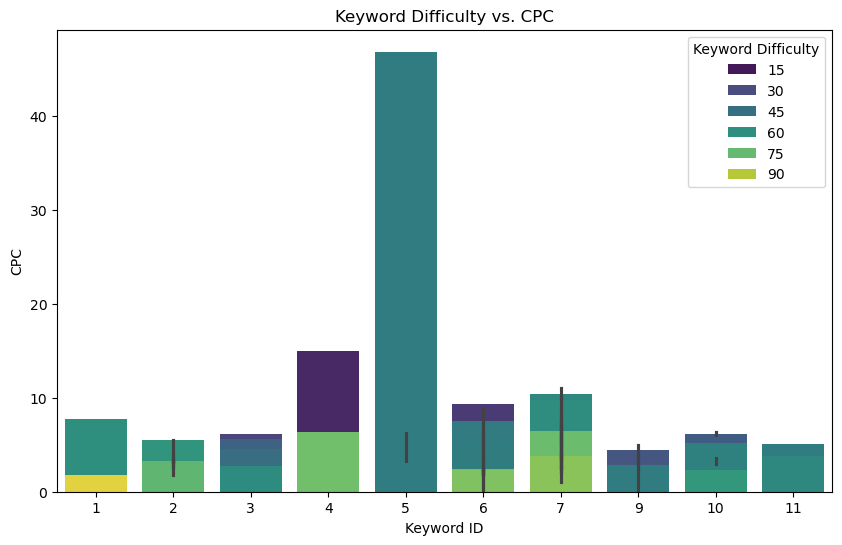

In [14]:
#. Keyword Difficulty vs. CPC 
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Keyword_ID', y='CPC', hue='Keyword Difficulty', data=df, palette='viridis', dodge=False, legend=True)
plt.title('Keyword Difficulty vs. CPC')
plt.xlabel('Keyword ID')
plt.ylabel('CPC') 
plt.show()


Insights:
1. Keyword ID 5: Highest search volume but highest difficulty, indicating strong competition.
2. Keyword IDs 2, 6, 7, 9, 10, 11: Moderate search volume with varying keyword difficulties, offering potential opportunities.
3. Keyword IDs 1, 4: Low search volume and difficulty, potentially less worthwhile unless highly specific and relevant.
Recommendations
1. Prioritize ID 5 cautiously: High search volume but challenging. Focus on long-tail keywords.
2. Explore IDs 2, 6, 7, 9, 10, 11: Balance search volume and difficulty for targeting.
3. Re-evaluate IDs 1, 4: Refine or combine to increase relevance and search volume.
5. Competitive analysis: Investigate top-ranking content for ID 5.
6. Budget allocation: Allocate based on difficulty and potential return.
7. Long-tail keywords: Target more specific, less competitive terms.


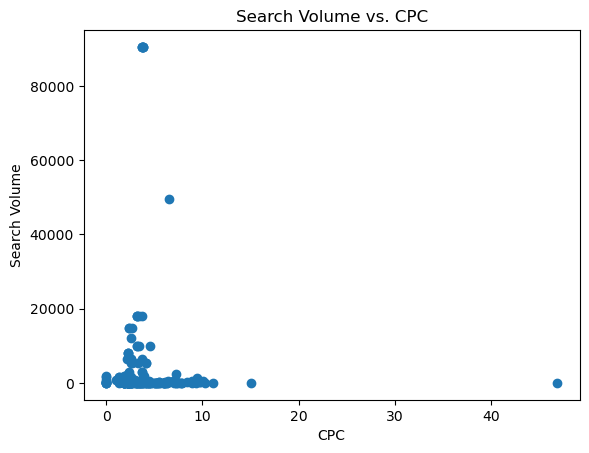

In [8]:
#Performing Kmeans on the Search Volume and CPC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['CPC'], df['Search Volume'])
plt.title('Search Volume vs. CPC')
plt.xlabel('CPC')
plt.ylabel('Search Volume')
plt.show()


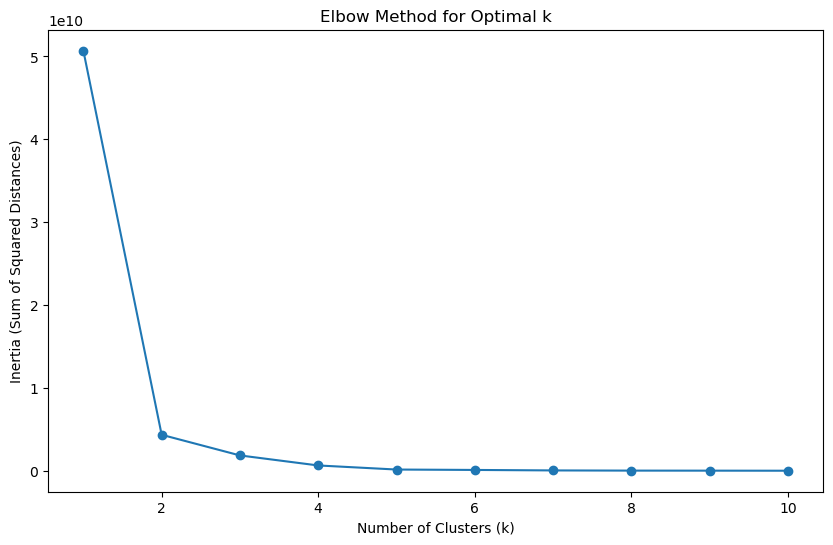

In [9]:

# Elbow method to find out how many clusters will be formed.

from sklearn.cluster import KMeans

# Make a list to store the WCSS values
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df[['Search Volume', 'CPC']])  # Ensure you select the columns you want to cluster on
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


In [12]:
# Extract a numpy array
features_array = df[['Search Volume', 'CPC']].values
# Make an object
km = KMeans(n_clusters=3)
ymeans = km.fit_predict(features_array)


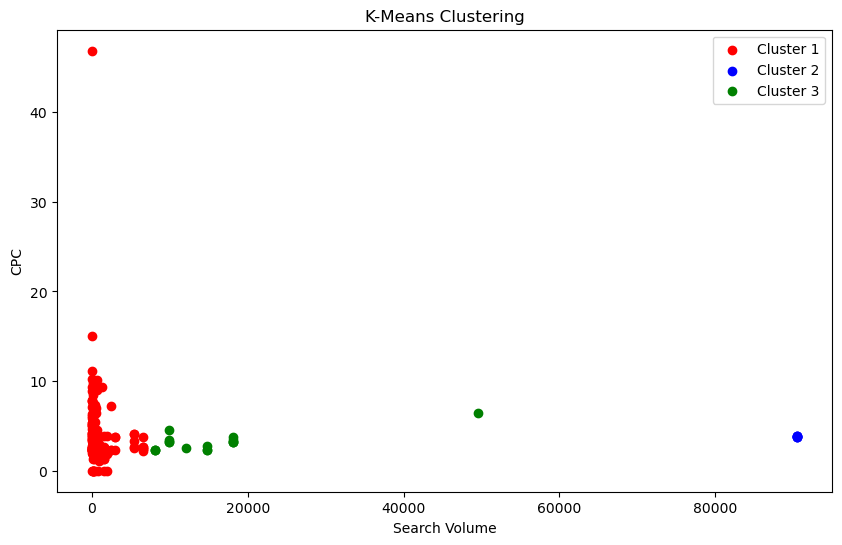

In [14]:
# Define colors for the clusters
colors = ['red', 'blue', 'green']

# Plot each cluster
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(features_array[ymeans == i, 0], features_array[ymeans == i, 1], color=colors[i], label=f'Cluster {i+1}')

plt.title('K-Means Clustering')
plt.xlabel('Search Volume')
plt.ylabel('CPC')
plt.legend()
plt.show()


Insigts
1. Cluster 1 (Red): Low search volume, varying CPC - Allocate less budget, focus on high CPC keywords.
2. Cluster 2 (Green): Moderate search volume, moderate CPC - Invest more for balanced ROI, monitor and adjust bids.
3. Cluster 3 (Blue): High search volume, low CPC - Allocate significant budget for cost-effective, high-impact results.
4. Diversify Investment: Spread the budget across clusters to balance risk and optimize returns.
5. Continuous Monitoring: Regularly review performance and adjust budget to maximize ROI.


In [20]:
# Performing Label encoding on Keyword
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Apply Label Encoding to "Keyword"
df['Keyword_Encoded'] = le.fit_transform(df['Keyword'])

# Display the updated DataFrame with the encoded column
print(df[['Keyword', 'Keyword_Encoded']])  # Show only relevant columns



                                        Keyword  Keyword_Encoded
0                             pmp certification               68
1                             pmp certification               68
2                             pmp certification               68
3                    scrum master certification              105
4                             pmp certification               68
..                                          ...              ...
193  pmp certification 35 hours online training               69
194       scrum alliance csm certification cost              104
195                      duration of pmp course               31
196                   togaf certification price              151
197                        itil foundation test               52

[198 rows x 2 columns]


               Traffic  Traffic Cost
Traffic       1.000000      0.997286
Traffic Cost  0.997286      1.000000


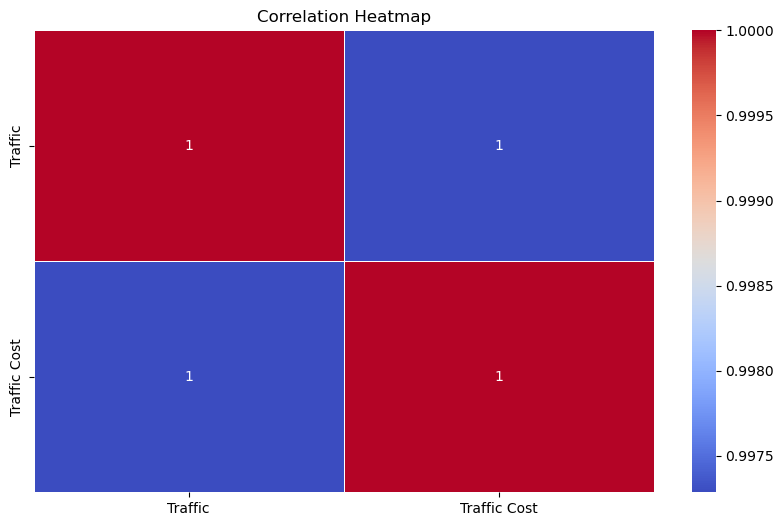

In [4]:
correlation = df[['Traffic', 'Traffic Cost']].corr()
print(correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

1. Strong Positive Correlation: The correlation value of 0.997286 between "Traffic" and "Traffic Cost" indicates a significant relationship.

2. Strategy: Increased traffic leads to higher traffic costs. Balance traffic growth with cost management.

3. Further Analysis: Consider other factors that might affect traffic cost, such as conversion rates or ad spend efficiency, for a comprehensive understanding.

                    Competition  Keyword Difficulty
Competition            1.000000            0.083532
Keyword Difficulty     0.083532            1.000000


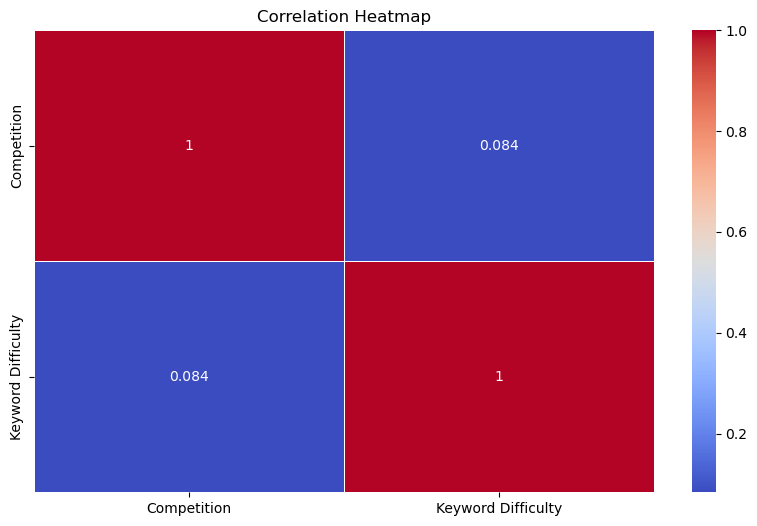

In [5]:
#Relationship between Competition and Keyword Difficulty
correlation = df[['Competition', 'Keyword Difficulty']].corr()
print(correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Insights
1. Very Weak Positive Correlation: The correlation value of 0.083532 between "Competition" and "Keyword Difficulty" suggests a minimal relationship.

2. Actionable Strategy: Other factors besides competition likely influence keyword difficulty more significantly. Focus on improving keyword relevance and user intent to boost SEO.

3. Further Analysis: Investigate additional variables to understand what drives keyword difficulty in your niche

In [7]:
#Code for Linear Regression:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare Data
X = df[['Traffic']]
y = df['Traffic Cost']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Mean Squared Error: 29817.693200016947
R-squared: 0.9143210714718364
Intercept: -19.853272426691717
Coefficient: 3.751039434540534


Insights
1. R-squared (0.9143): Indicates that approximately 91.43% of the variance in "Traffic Cost" can be explained by "Traffic." This suggests a very strong fit of the model.

2. Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In this case, 29817.6932 is the MSE.

3. Intercept (-19.8533): Represents the expected value of "Traffic Cost" when "Traffic" is zero. In this case, it's approximately -19.85, which might not be meaningful in a real-world context.

4. Coefficient (3.7510): Indicates the expected change in "Traffic Cost" for a one-unit increase in "Traffic." Here, for every additional unit of traffic, the traffic cost increases by approximately 3.75 units.

Overall, this model shows a strong positive relationship between traffic and traffic cost, but we should also consider the MSE and context when applying these results.

In [13]:
# Linear Regression for Keyword Difficulty and Competition

#Prepare Data
X = df[['Keyword Difficulty']]
y = df['Competition']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Mean Squared Error: 0.04322953267908469
R-squared: -0.015039861914688979
Intercept: 0.3201686023327596
Coefficient: 0.0011285485995824885


Insights
1. R-squared (-0.0150): Indicates a poor fit; "Competition" does not explain much of the variance in "Keyword Difficulty."

2. Mean Squared Error (MSE): 0.0432: Represents the average squared difference between actual and predicted values; the lower value suggests minimal error.

3. Coefficient (0.0011): Minimal relationship; for every unit increase in "Competition," "Keyword Difficulty" increases by 0.0011 units.

Overall, "Competition" has a very weak influence on "Keyword Difficulty." Consider exploring additional variables for a better model.


In [28]:
#Apply Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['CPC', 'Search Volume', 'Traffic', 'Traffic Cost', 'Keyword Difficulty', 'Competition']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())  # Check scaled values


                                               Title  \
0  PMP® Exam & Certification | Flat 40% Off - Enr...   
1  PMP® Exam & Certification | Confidently Ace Th...   
2  PMP® Training & Exam | Special Offer: Get $400...   
3  CSM Scrum Master Course Online | Today's Offer...   
4   PMP® Certification | Ace PMP Exam in 1st Attempt   

                      Keyword  Keyword_ID  Position  Previous position  \
0           pmp certification           7         1                  1   
1           pmp certification           7         1                  1   
2           pmp certification           7         2                  2   
3  scrum master certification           2         1                  1   
4           pmp certification           7         3                  3   

        CPC  Number of Results  \
0 -0.042859          166000000   
1 -0.042859          172000000   
2 -0.027283          154000000   
3 -0.185634           32000000   
4 -0.027283          165000000   

             

1. CPC (Cost-Per-Click)
The values for CPC are now standardized.
Example:
CPC = -0.042859 means it's slightly below average.
CPC = -0.185634 means it's lower than average.
Conclusion: The cost of these keywords is relatively stable, with small variations around the mean.

2. Competition
Standardized values like 1.097232 and 1.349909 indicate that these keywords have higher than average competition.
Conclusion: PMP-related keywords are highly competitive, meaning many advertisers are bidding on them.

3. Keyword Difficulty
Example:
Keyword Difficulty = 1.687415 (PMP Certification) → Above average difficulty
Keyword Difficulty = 1.179219 (Scrum Master Certification) → Slightly above average difficulty
Conclusion: PMP-related keywords are generally harder to rank for in search results compared to Scrum Master-related keywords.

4. Search Volume
Example:
Search Volume = 5.360448 (PMP Certification) → Above average search volume
Search Volume = 0.835326 (Scrum Master Certification) → Below average search volume
Conclusion: PMP certification has significantly higher search interest than Scrum Master certification.

5. Traffic & Traffic Cost
Example:
Traffic Cost = 9.371159 (PMP Certification) → High cost for traffic
Traffic Cost = 1.436199 (Scrum Master Certification) → Lower cost for traffic
Conclusion: PMP-related keywords require more ad spending to get traffic, indicating strong competition in paid search.

Overall Insights
✅ PMP Certification keywords are highly competitive, expensive, and have high search volume.
✅ Scrum Master Certification has lower search volume and traffic cost, meaning less competition.
✅ Advertisers should expect to spend more for PMP-related ads due to high CPC and competition.
✅ PMP keywords will require more effort to rank due to higher difficulty.